# Capstone 3: Making Predictions on Depletion of Five Natural Resources

## EDA Water-Oil Forecasting, Seismic Surveying and Impacts

#### Brief summary statistics

The previous notebook explored data from the Global Power Plant Database and the Statistical Review of World Energy (by BP). Some main discoveries includes:

I. Coal:
- Taiwan, South Korea, South Africa, and Malaysia are the top 4 countries with highest estimated electricity generation (in gwh) in 2017, respectively.
- Total world coal consumption reached its peak around 2012-2014; since then it declined, went up around 2016 and declined again in 2018. 
- China is the leading country in both coal consumption and coal production, leading in coal consumption from 1991-present and leading in coal production from 1994-present. US. holds second place.
- From 1965-2020, trend for coal consumption (EJ) is as follows:
a. Asia Pacific countries have a positive slope, with peak around 2018.
b. There is a downward slope seen from 1985-present for countries in Europe and Commonwealth of Independent States.
c. There is a downward slope seen from 2010 for North American countries and again around 2014.
- Ever since 2000, the world has been consuming more coal than it is producing coal, up until 2018 when world coal production surpassed world coal consumption.

II. Oil:
- Taiwan, Iraq, South Korea, and Japan are the top 4 countries with highest estimated electricity generation (in gwh) in 2017, respectively.
- Azerbaijan, Taiwan, Japan, and South Korea are the top 4 countries with highest capacity (mw). 
- Total world oil consumption reached its peak around 2018-2019, then hit a sharp downward slope after that. There was a sharp upward slope from 1965-1973, then a gradual decline around 1979-1984. 
- The U.S. is the leading country in both oil consumption and oil production, leading in oil consumption from 1974-present and in oil production from 2015-2019. It looks like we are short on production, consuming more oil than we are producing. 
- From 1965-2020, trend for oil consumption (barrels/day) is as follows:
a. North America held the top spot of oil consumption until around 2016, where Asia Pacific countries surpassed North American countries. Ever since then, Asia Pacific countries have dominated in oil consumption. All countries hit a decline in oil consumption around 2019. 
b. Only Commonwealth of Independent States had a downward decline in oil consumption from 1990-2000. 
c. Sharp increases in oil consumption happened in parallel from 1965-1973 for North American countries, the EU, and Asia Pacific countries. There was a decline for all three regions from 1978-1983.
d. African countries have the lowest oil consumption.
- There was a sharp decline in total world oil production around 1978-79 (the 1979 oil crisis, probably). It's not until 1990 that a gradual increase in oil production can be seen. At that year, consumption had exceeded production by about 1,000 barrels/day. Consumption has continually exceeded production by about 1,000-2,000 barrels/day. 
- At the end of 2000, Saudi Arabia held top spot for the most oil reserves.
- At the end of 2020, 2010, and 2019, Venezuela held top spot for the most oil reserves. In 2000, Venezuela was in 8th place. 

These patterns of consumption exceeding production could be a sign that we aren't able to keep up with the current population growth and meet its needs. 

## Supply and Demand

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path1 = r'C:\Users\yuvem\Downloads\Supply_Demand_Oil.xlsx'
xls = pd.ExcelFile(path1)
print(xls.sheet_names)

['Sheet1']


In [3]:
supply_demand = pd.read_excel(xls, 'Sheet1')
supply_demand.head()

,Quarter,Oced_D_Canada,Oced_D_Europe,Oced_D_Japan,Oced_D_Other OECD,Oced_D_U.S. (50 States),Oced_D_U.S. Territories,Oced_D_Total OECD,Oced_D_As % of World Demand,NOced_D_China,...,OECD Net deficit / surplus,U.S. (50 States) Total Demand,U.S. (50 States) Total Supply,U.S. (50 States) Net deficit / surplus,Former Soviet Union Total Demand,Former Soviet Union Total Supply,Former Soviet Union Net deficit / surplus,China Total Demand,China Total Supply,China Net deficit / surplus
0,2019 Q3,2.566667,14.656667,3.426667,6.536667,20.713333,0.173333,48.073333,47.017018,14.370000,...,-16.590000,20.713333,19.450000,-1.263333,5.583333,14.580000,8.996667,14.370000,4.890000,-9.480000
1,2019 Q2,2.320000,14.176667,3.393333,6.456667,20.456667,0.170000,46.973333,46.508251,14.646667,...,-15.650000,20.456667,19.353333,-1.103333,5.193333,14.426667,9.233333,14.646667,4.923333,-9.723333
2,2019 Q1,2.310000,14.050000,4.056667,6.616667,20.356667,0.190000,47.580000,47.346424,14.456667,...,-16.520000,20.356667,18.863333,-1.493333,5.146667,14.856667,9.710000,14.456667,4.890000,-9.566667
3,2018 Q4,2.580000,14.163333,3.886667,6.383333,20.593333,0.160000,47.770000,47.422237,14.100000,...,-16.276667,20.593333,19.033333,-1.560000,5.356667,14.883333,9.526667,14.100000,4.810000,-9.290000
4,2018 Q3,2.653333,14.700000,3.526667,6.490000,20.706667,0.153333,48.230000,47.634568,13.883333,...,-17.646667,20.706667,18.436667,-2.270000,5.503333,14.630000,9.126667,13.883333,4.733333,-9.150000


In [4]:
supply_demand.to_excel('supply_demand.xlsx', index = False)

In [5]:
i = supply_demand[((supply_demand.Quarter == '2015 Q1'))].index
i

Int64Index([18], dtype='int64')

In [6]:
i2 = supply_demand[((supply_demand.Quarter == '2019 Q3'))].index
i2

Int64Index([0], dtype='int64')

In [7]:
supply_demand_19_15 = supply_demand.iloc[0:19]

In [8]:
supply_demand_19_15.to_excel('supply_demand_19_15.xlsx', index = False)

In [9]:
df_grouped = supply_demand_19_15.groupby('Quarter').sum()[['Oced_D_Total OECD','Oced_D_As % of World Demand','NOced_D_Total Non-OECD','NOced_D_As % of World Demand', 'Total World Demand']]

In [10]:
# sort values
df_grouped = df_grouped.sort_values('Quarter')
df_grouped

,Oced_D_Total OECD,Oced_D_As % of World Demand,NOced_D_Total Non-OECD,NOced_D_As % of World Demand,Total World Demand
Quarter,,,,,
2015 Q1,46.680000,49.447407,47.723333,50.552593,94.403333
2015 Q2,45.696667,48.017513,49.470000,51.982487,95.166667
2015 Q3,47.023333,48.569461,49.793333,51.430539,96.816667
2015 Q4,46.546667,48.373575,49.676667,51.626425,96.223333
2016 Q1,46.786667,48.776758,49.133333,51.223242,95.920000
2016 Q2,46.093333,47.837819,50.260000,52.162181,96.353333
2016 Q3,47.306667,48.614394,50.003333,51.385606,97.310000
2016 Q4,47.376667,48.654662,49.996667,51.345338,97.373333
2017 Q1,46.956667,48.347462,50.163333,51.649106,97.123333


In [11]:
df_grouped.to_excel('df_grouped.xlsx', index = False)

## Tableau

Using Tableau, I created a stacked bar chart with OCED % World Demand, Non-OECD % World Demand, and OCED % World Supply and Non-OECD % World Supply. The next stacked bar chart shows net deficit surplus for OECD, U.S. and China. 

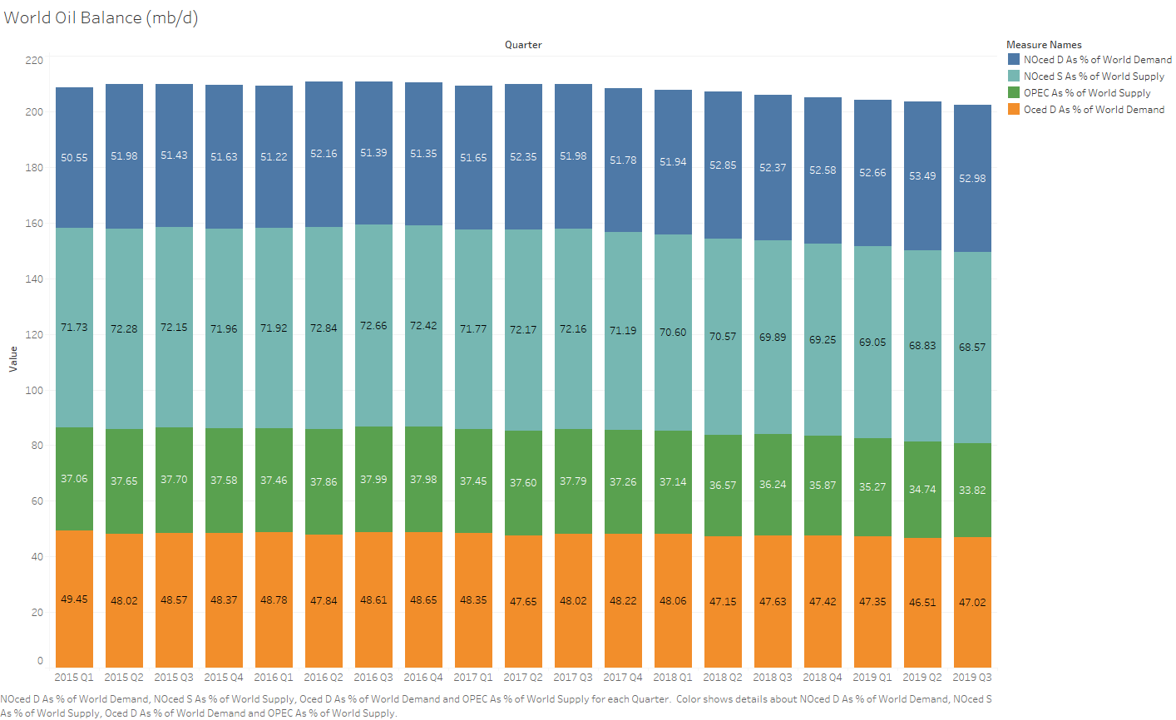

In [12]:
from IPython.display import Image
Image(r"C:\Users\yuvem\OneDrive\Pictures\world_oil_balance.png")

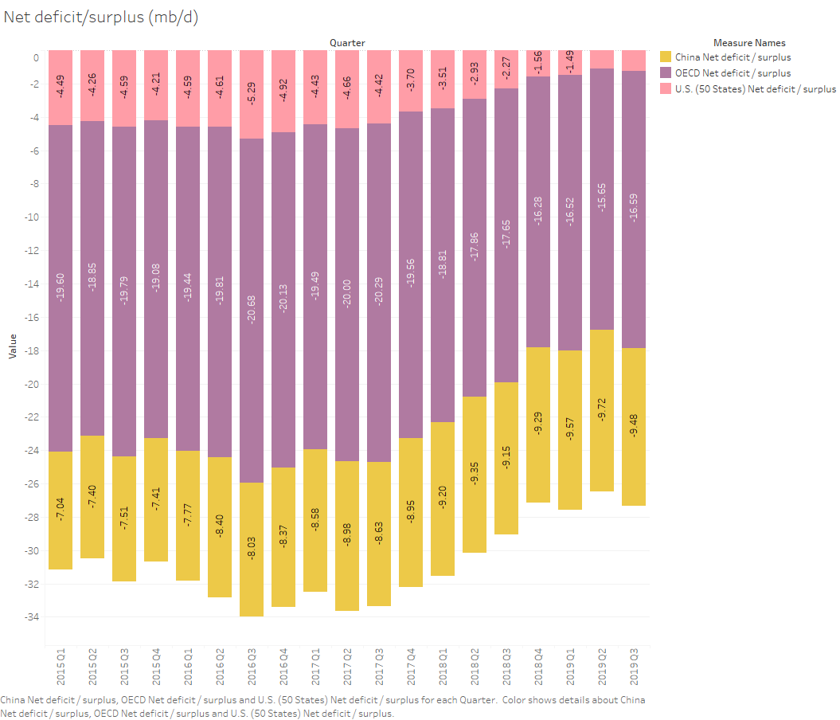

In [13]:
Image(r"C:\Users\yuvem\OneDrive\Pictures\net_deficit_surplus.png")

### Forecasting World Supply and Demand

These forecasts are unfortunately 100% trend and 0% seasonal.

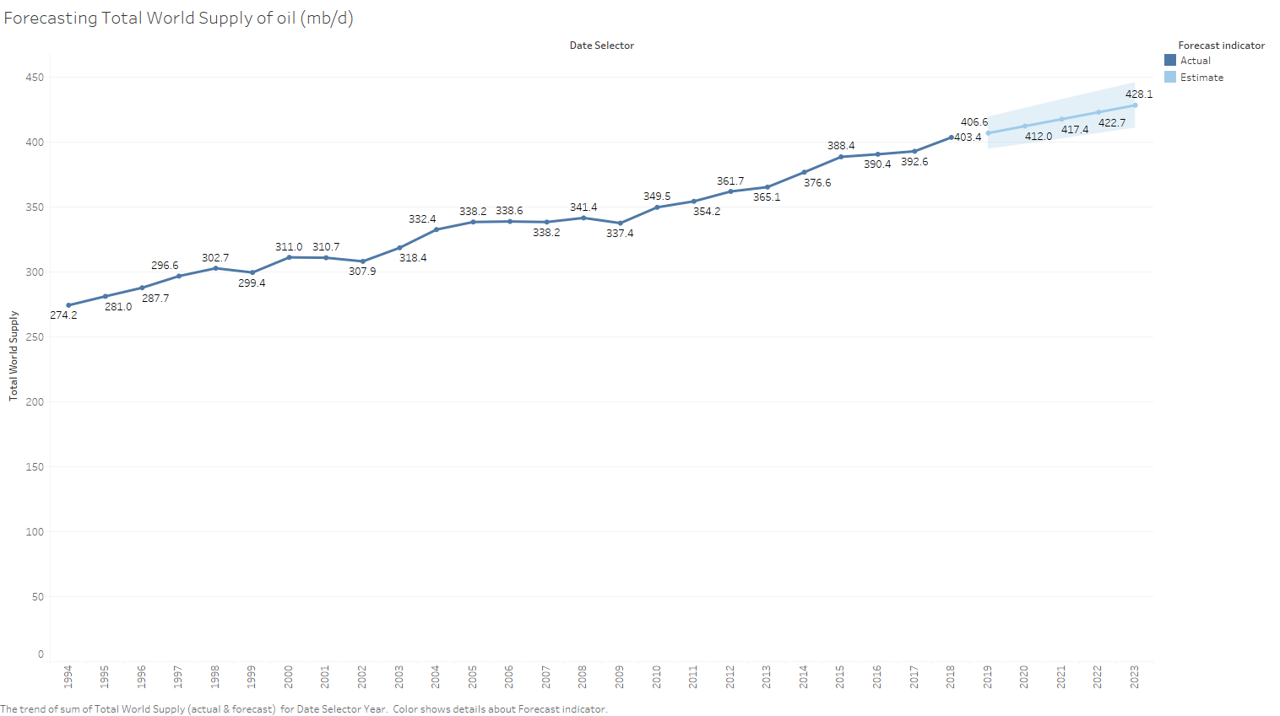

In [14]:
Image(r"C:\Users\yuvem\OneDrive\Pictures\forecast_world_supply.png")

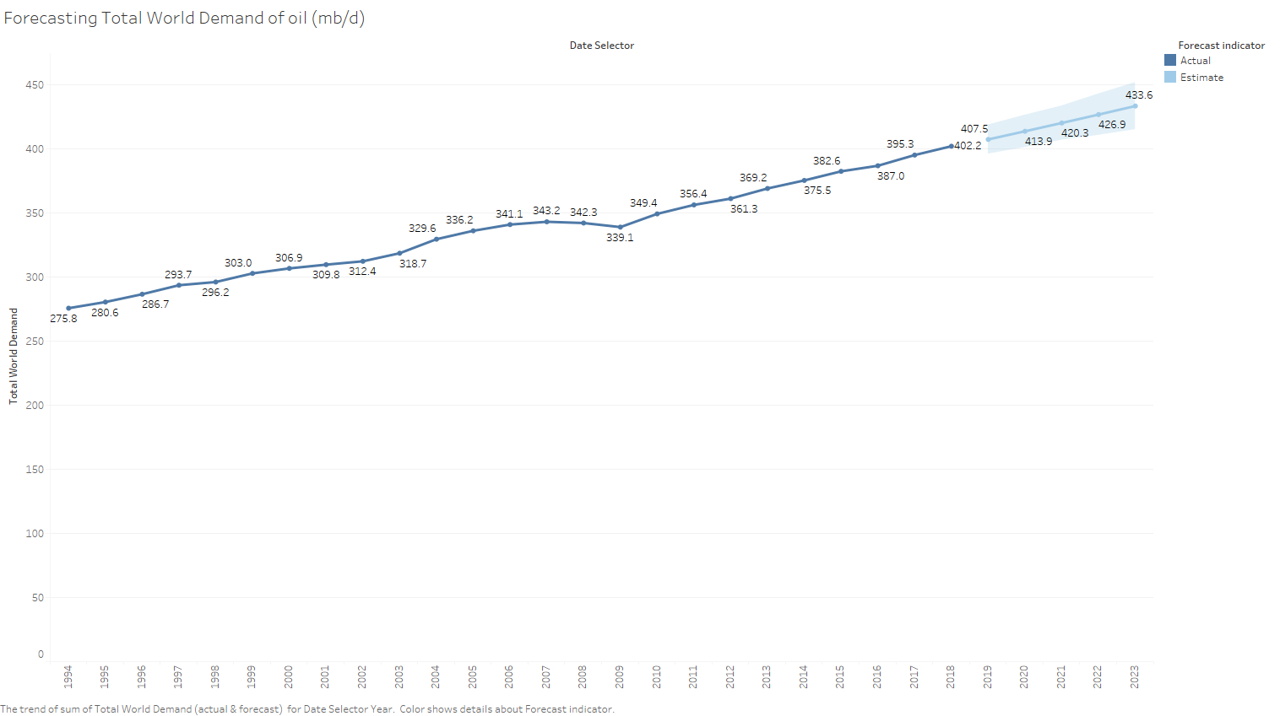

In [15]:
Image(r"C:\Users\yuvem\OneDrive\Pictures\forecast_world_demand.png")

## Reserves Estimation

Using this [AAPG Wiki](https://wiki.aapg.org/Reserves_estimation) page, I can target my desired parameters. Estimating hydrocarbon reserves is a complex process that involves integrating geological and engineering data. Depending on the amount and quality of data available, one or more of the following methods may be used to estimate reserves:
- Volumetric
- Material balance
- Production history
- Analogy

In [16]:
table = {'Method':  ['Volumetric', 'Material balance', 'Production history', 'Analogy'],
        'Application': ['OOIP, OGIP, recoverable reserves. Use early in life of field', 'OOIP, OGIP (assumes adequate production history available), recoverable reserves (assumes OOIP and OGIP known). Use in a mature field with abundant geological, petrophysical, and engineering data.','Recoverable reserves. Use after a moderate amount of production data is available.','OOIP, OGIP, recoverable reserves. Use early in exploration and initial field development.'],
         'Accuracy': ['Dependent on quality of reservoir description. Reserves estimates often high because this method does not consider problems of reservoir heterogeneity.','Highly dependent on quality of reservoir description and amount of production data available. Reserve estimates variable.','Dependent on amount of production history available. Reserve estimates tend to be realistic.','Highly dependent on similarity of reservoir characteristics. Reserve estimates are often very general.']
        }

table_reserveinfo = pd.DataFrame(table, index=['Method_1','Method_2', 'Method_3', 'Method_4'])
table_reserveinfo.head()

,Method,Application,Accuracy
Method_1,Volumetric,"OOIP, OGIP, recoverable reserves. Use early in...",Dependent on quality of reservoir description....
Method_2,Material balance,"OOIP, OGIP (assumes adequate production histor...",Highly dependent on quality of reservoir descr...
Method_3,Production history,Recoverable reserves. Use after a moderate amo...,Dependent on amount of production history avai...
Method_4,Analogy,"OOIP, OGIP, recoverable reserves. Use early in...",Highly dependent on similarity of reservoir ch...


Terminology: 
- OOIP = Original Oil in place
- OGIP = Original Gas in place

### WOR Forecasting and EUR

This WOR data comes from the [Argonne National Laboratory](https://publications.anl.gov/anlpubs/2009/07/64622.pdf), which is a study that reports hydrocarbon-specific water-oil ratios for 15 U.S. states. For the remainder of the States, the produced oil and water was used to calculate the WOR.  

I was unable to find data available in raw excel or csv format, however the tables were presented in the study. These tables I copied in Excel. 

EUR is estimate ultimate recovery and it is required for reservoir management. It's important to differentiate oil reserves and oil resources; oil resources is the sum of recoverable and unrecoverable volumes of oil in place, whereas oil reserves are amounts of oil anticipated to be commercially recoverable froma given datae under defined conditions (see paper for [Calculation of EUR form Oil and Water Production Data](http://www.ieomsociety.org/ieom2018/papers/367.pdf)). 

In [75]:
path1 = r'C:\Users\yuvem\OneDrive\Documents\GitHub\Personal-Capstone-Projects\Estimating when four natural resources will be depleted\Datasets\Report on Produced Water.xlsx'
print(path1)

C:\Users\yuvem\OneDrive\Documents\GitHub\Personal-Capstone-Projects\Estimating when four natural resources will be depleted\Datasets\Report on Produced Water.xlsx


In [76]:
xls = pd.ExcelFile(path1)
print(xls.sheet_names)

['Oil, Gas, Produced Water Gen', 'Water-to-Hydrocarbon Ratio', 'Produced Water Volume']


In [77]:
# Data for oil, gas, produced water generation
oil_gas_h20_gen = pd.read_excel(xls, 'Oil, Gas, Produced Water Gen', header=[0])
oil_gas_h20_gen.head()

,State,Crude Oil (bbl/year),Total Gas (Mmcf),Produced Water (bbl/year),Data Source,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,Alabama,5028000,285000.0,119004000,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,263595000,3498000.0,801336000,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona,43000,1000.0,68000,"1,2",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,6103000,272000.0,166011000,"2,3",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,California,244000000,312000.0,2552194000,"2,3",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
oil_gas_h20_gen = oil_gas_h20_gen[['State','Crude Oil (bbl/year)','Total Gas (Mmcf)','Produced Water (bbl/year)']]

In [79]:
oil_gas_h20_gen_indexed = oil_gas_h20_gen.set_index('State')

In [80]:
oil_gas_h20_gen_indexed.dropna()

,Crude Oil (bbl/year),Total Gas (Mmcf),Produced Water (bbl/year)
State,,,
Alabama,5028000,285000.0,119004000
Alaska,263595000,3498000.0,801336000
Arizona,43000,1000.0,68000
Arkansas,6103000,272000.0,166011000
California,244000000,312000.0,2552194000
Colorado,2375000,1288000.0,383846000
Florida,2078000,2000.0,50296000
Indiana,1727000,4000.0,40200000
Kansas,36612000,371000.0,1244329000


In [81]:
# Basic stats summary
oil_gas_h20_gen_indexed['Produced Water (bbl/year)'].describe()

count    3.600000e+01
mean     1.749598e+09
std      4.833172e+09
min      6.800000e+04
25%      7.987750e+06
50%      1.427255e+08
75%      7.527945e+08
max      2.099517e+10
Name: Produced Water (bbl/year), dtype: float64

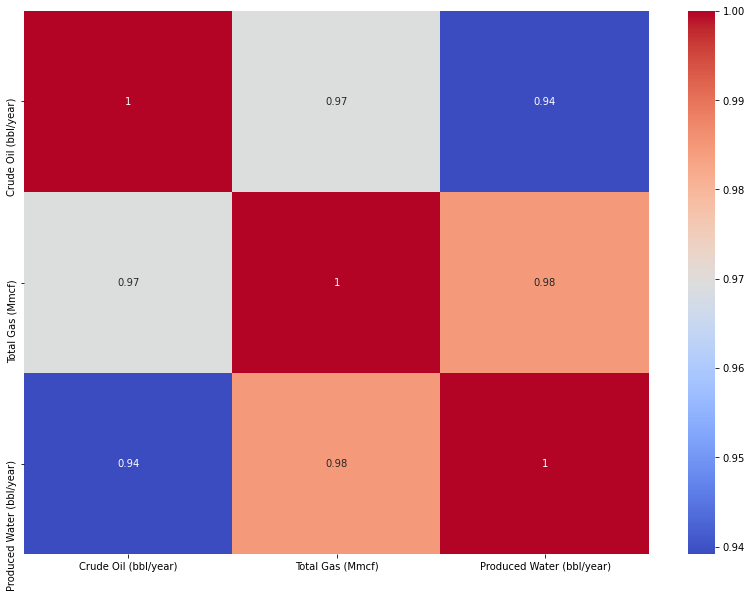

In [82]:
# Correlation Heatmap
_= plt.figure(figsize=(14,10))
heatmap = sns.heatmap(oil_gas_h20_gen_indexed.corr(), annot=True, cmap="coolwarm")
plt.show()

In [83]:
# data for water-to-hydrocarbon ratio
water_hydrocarb = pd.read_excel(xls, 'Water-to-Hydrocarbon Ratio', header=[0])
water_hydrocarb.head()

,State,Water to Crude Oil (bbl/bbl),Water to Gas (bbl/Mmcf),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Alabama,7.7,282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,2.9,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,California,10.5,7.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Florida,24.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Illinois,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
water_hydrocarb = water_hydrocarb[['State','Water to Crude Oil (bbl/bbl)','Water to Gas (bbl/Mmcf)']]

In [85]:
water_hydrocarb_indexed = water_hydrocarb.set_index('State')

In [86]:
water_hydrocarb_indexed.dropna()

,Water to Crude Oil (bbl/bbl),Water to Gas (bbl/Mmcf)
State,,
Alabama,7.70,282.0
Alaska,2.90,4.4
California,10.50,7.6
Kansas,21.80,1208.0
Mississippi,13.50,35.9
Montana,4.00,453.0
Nebraska,20.90,358.0
New Mexico,9.00,91.5
North Dakota,3.00,18.0


In [87]:
# Basic statistical summary of variable
water_hydrocarb_indexed['Water to Crude Oil (bbl/bbl)'].describe()

count    17.000000
mean     12.561176
std      10.856156
min       1.040000
25%       4.000000
50%       9.000000
75%      20.300000
max      42.700000
Name: Water to Crude Oil (bbl/bbl), dtype: float64

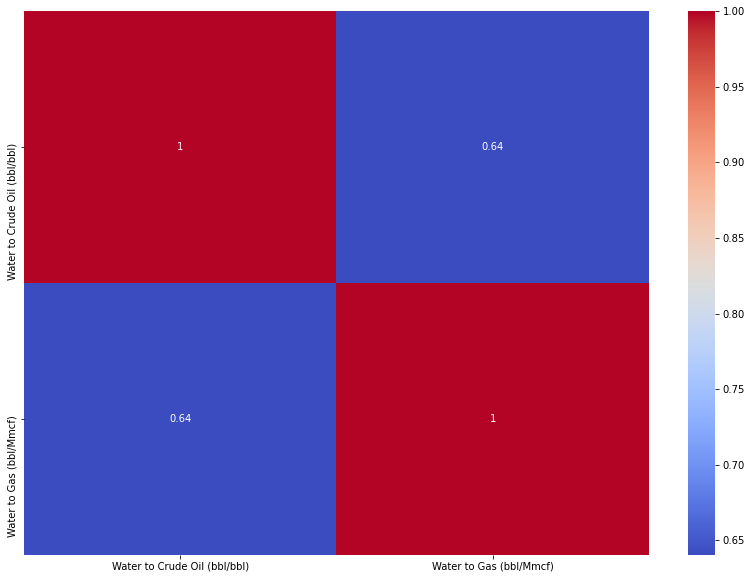

In [88]:
# Correlation Heatmap
_= plt.figure(figsize=(14,10))
heatmap = sns.heatmap(water_hydrocarb_indexed.corr(), annot=True, cmap="coolwarm")
plt.show()

In [89]:
# data for produced water volume
prod_h20_vol = pd.read_excel(xls, 'Produced Water Volume', header=[1])
prod_h20_vol.head()

,State,Injection for Enhanced Recovery,Injection or Disposal,Surface Discharge,Total Managed,Total Generated,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Alabama,7.500000e+06,33000000.0,78000000.0,1.190000e+08,119004000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,1.037909e+09,39914000.0,35480000.0,1.113302e+09,801336000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona,NaN,35000.0,NaN,3.500000e+04,68000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,4.548900e+07,120169000.0,NaN,1.660110e+08,166011000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,California,1.764609e+09,558188000.0,NaN,2.322797e+09,2552194000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
prod_h20_vol = prod_h20_vol[['State','Injection for Enhanced Recovery','Injection or Disposal','Surface Discharge','Total Managed','Total Generated']]

In [91]:
prod_h20_vol_indexed = prod_h20_vol.set_index('State')

In [92]:
prod_h20_vol_indexed.dropna()

,Injection for Enhanced Recovery,Injection or Disposal,Surface Discharge,Total Managed,Total Generated
State,,,,,
Alabama,7.500000e+06,3.300000e+07,78000000.0,1.190000e+08,119004000
Alaska,1.037909e+09,3.991400e+07,35480000.0,1.113302e+09,801336000
Nebraska,3.158800e+07,1.433700e+07,500000.0,4.931200e+07,49312000
South Dakota,2.122000e+06,1.853000e+06,85000.0,4.146000e+06,4186000
Utah,7.825100e+07,6.205100e+07,21080000.0,1.731450e+08,148579000
State Total,1.067653e+10,7.144071e+09,139002000.0,1.805853e+10,20258560000
Federal Offshore,4.867300e+07,1.298000e+06,537381000.0,5.873530e+08,587353000
Total,1.072520e+10,7.145369e+09,676383000.0,1.864588e+10,20995174000


In [93]:
# Basic stat summary 
prod_h20_vol_indexed['Injection for Enhanced Recovery'].describe()

count    2.400000e+01
mean     1.338622e+09
std      3.070216e+09
min      4.870000e+05
25%      3.377200e+07
50%      7.225600e+07
75%      5.721848e+08
max      1.072520e+10
Name: Injection for Enhanced Recovery, dtype: float64

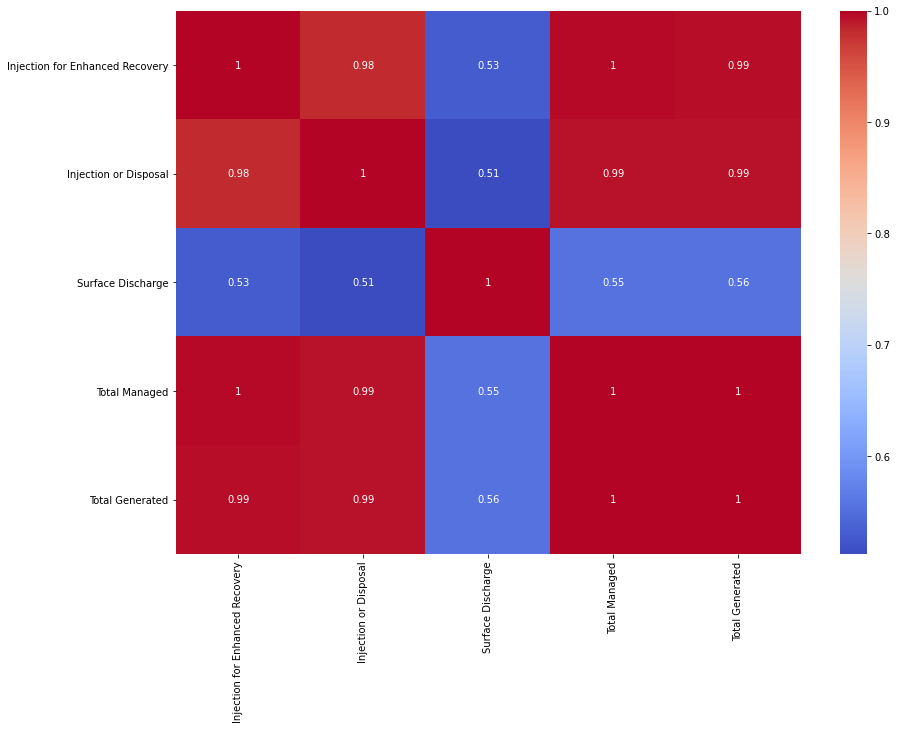

In [94]:
# Correlation Heatmap
_= plt.figure(figsize=(14,10))
heatmap = sns.heatmap(prod_h20_vol_indexed.corr(), annot=True, cmap="coolwarm")
plt.show()

### Production decline analysis (DCA)

### Type curve analysis

### Seismic Impact of Wastewater Injection Wells